# Projekt zaliczeniowy
## Twórcy:
### Magdalena Kobierecka, 141879
### Tomasz Rudziński, 155625
### Mateusz Baran, 155620

In [80]:
#!pip install numpy, pandas, matplotlib, scipy, notebook, requests, tqdm, seaborn
# open_meteo API:
#!pip install openmeteo-requests
#!pip install requests-cache retry-requests
# posgresql
#!pip install sqlalchemy psycopg2

In [81]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Pobieranie danych z bazy danych

In [82]:
from project_settings import DATABASE
from utils import get_data

df = get_data()

In [83]:
df.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,id
0,2014-01-21 23:00:00,-12.2455,77.992210,-15.2955,-17.457428,0.0,0.0,0.0,0.03,1.0,...,20.880001,-2.6955,-0.7955,0.9045,3.1545,0.37,0.377,0.392,0.376,1
1,2014-01-22 00:00:00,-12.5955,78.906710,-15.4955,-17.818140,0.0,0.0,0.0,0.03,1.0,...,20.880001,-2.7455,-0.7955,0.9045,3.1545,0.37,0.377,0.392,0.376,2
2,2014-01-22 01:00:00,-13.0955,79.482290,-15.8955,-18.356918,0.0,0.0,0.0,0.03,1.0,...,20.519999,-2.8955,-0.8455,0.9045,3.1045,0.37,0.377,0.392,0.376,3
3,2014-01-22 02:00:00,-13.5955,79.402210,-16.3955,-18.782642,0.0,0.0,0.0,0.03,1.0,...,20.880001,-2.9455,-0.8455,0.8545,3.1045,0.37,0.377,0.392,0.376,4
4,2014-01-22 03:00:00,-14.2455,79.965004,-16.9455,-19.325504,0.0,0.0,0.0,0.03,1.0,...,20.880001,-3.0955,-0.8455,0.8545,3.1045,0.37,0.376,0.392,0.376,5


In [84]:
df.iloc[:, 1:len(df.columns)-1].describe() # bez data oraz id

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
count,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,...,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.000000,87672.00000,87672.000000
mean,8.801438,78.103052,4.803576,5.953800,0.081461,0.071425,0.007169,0.006497,11.643835,1015.221409,...,202.826726,28.436146,9.279441,9.281455,9.230891,9.176996,0.351073,0.348771,0.33684,0.356727
std,8.525450,15.478332,7.468324,10.231857,0.308870,0.297900,0.054682,0.017400,21.512269,9.525482,...,91.298128,12.525185,7.939614,7.391483,6.356428,5.008926,0.045803,0.046327,0.05467,0.022789
min,-24.189000,19.508398,-27.389000,-29.505726,0.000000,0.000000,0.000000,0.000000,0.000000,970.000000,...,0.516162,1.800000,-11.688999,-7.939000,-0.245500,0.754500,0.135000,0.188000,0.18800,0.314000
25%,2.061000,68.147516,-0.339000,-2.339435,0.000000,0.000000,0.000000,0.000000,1.000000,1009.500000,...,138.674600,19.080000,1.811000,2.211000,3.261000,4.561000,0.334000,0.327000,0.29500,0.337000
50%,8.361000,81.932940,4.811000,5.048640,0.000000,0.000000,0.000000,0.000000,2.000000,1015.500000,...,214.919480,27.000000,8.411000,8.561001,8.911000,9.061001,0.364000,0.363000,0.35600,0.359000
75%,15.561001,90.655505,10.761001,14.098426,0.000000,0.000000,0.000000,0.000000,3.000000,1021.200000,...,274.635380,36.000000,16.111000,16.111000,15.311001,13.854500,0.380000,0.381000,0.38200,0.374000
max,32.711000,100.000000,22.611000,34.212006,7.200000,7.200000,1.890000,0.120000,75.000000,1048.200000,...,360.000000,92.159996,30.161001,26.504500,24.104500,21.154501,0.442000,0.438000,0.42700,0.411000


## Sprawdzanie pustych wartości.

In [85]:
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,date,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,id


# Macierz korelacji zmiennych

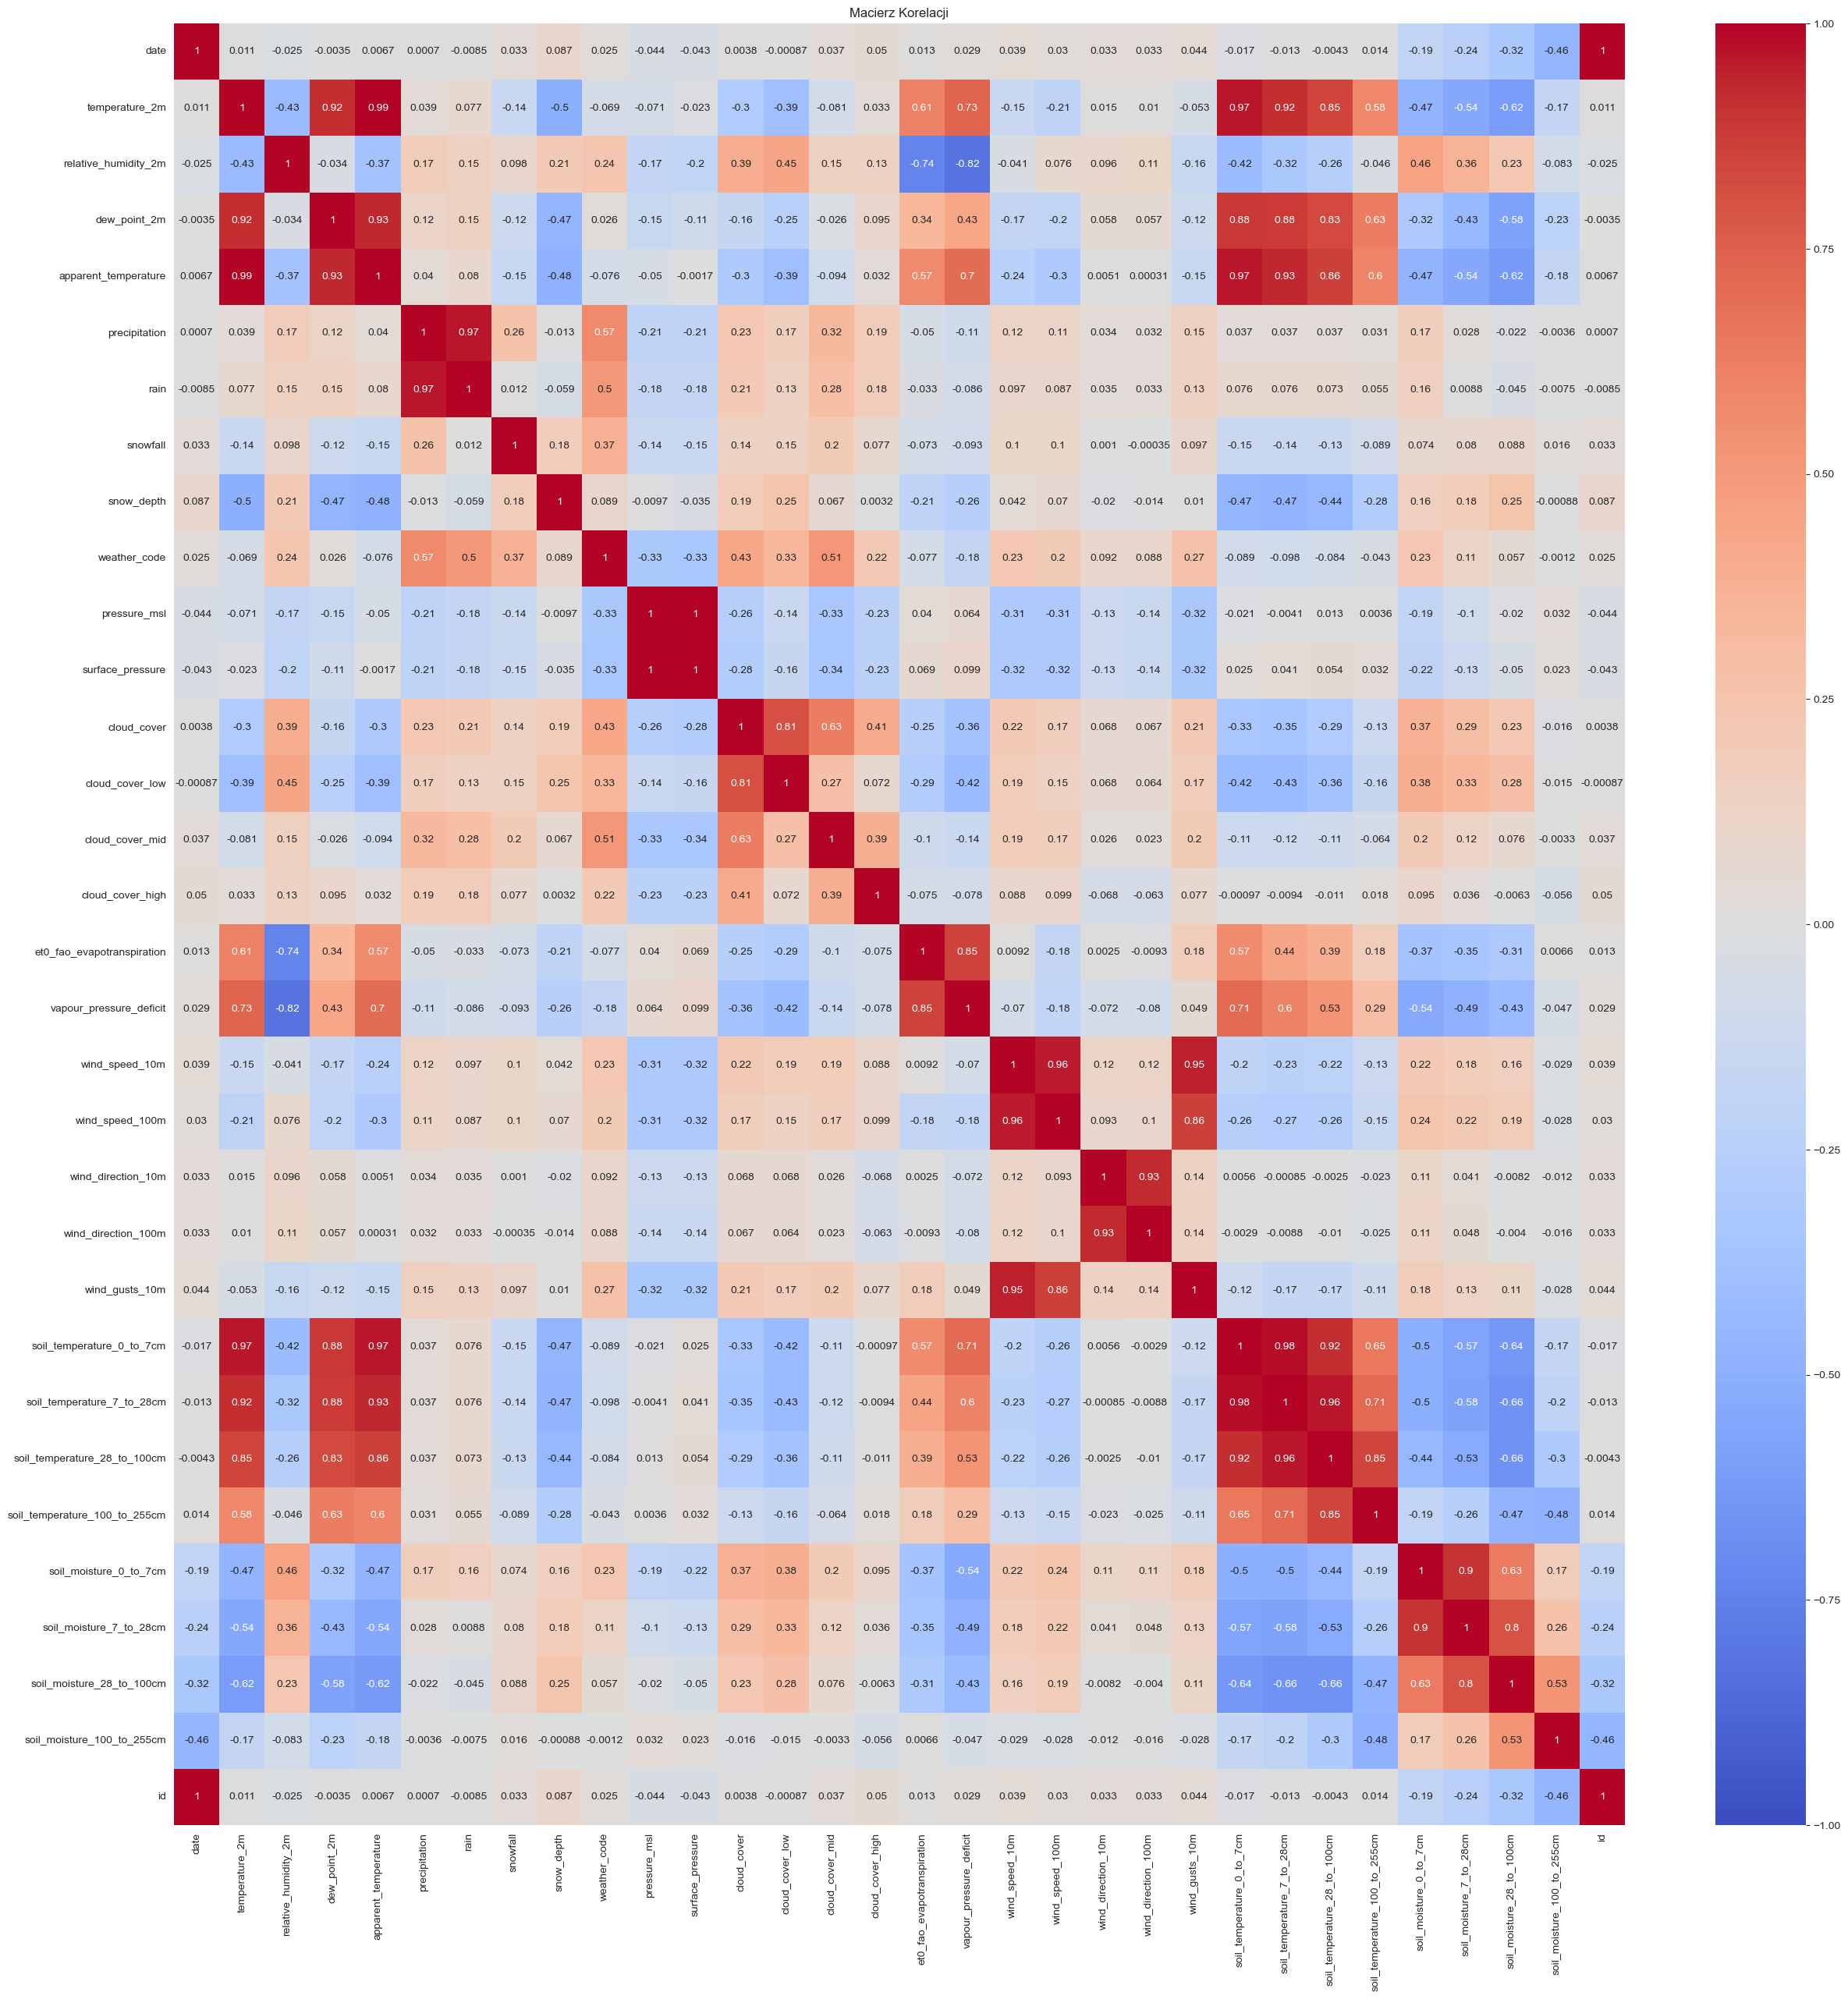

In [86]:
correlation_matrix = df.corr()
plt.figure(figsize=(30,30))
plt.tight_layout
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Dodanie tytułu
plt.title('Macierz Korelacji')
plt.savefig('correlation_matrix.png')
plt.show()

# Analiza
### Sprawdzenie korelacji miedzy temperaturą 2m a wilgotnością powietrza.

W tym celu użyje testu Pearsona aby sprawdzić zależność zmiennych.

Hipoteza 0: Temperatura nie ma wpływu na względną wilgotność powietrza na 2 metrach pomiaru.
Hipoteza 1: Temperatura ma wpływ na względną wilgotność powietrza na 2 metrach pomiaru. Im większa temperatura tym większa wilgotność.
Hipoteza 2: Temperatura ma wpływ na względną wilgotność powietrza na 2 metrach pomiaru. Im większa temperatura tym mniejsza wilgotność.

In [87]:
from utils import check_correlation

correlation = df['temperature_2m'].corr(df['relative_humidity_2m'])
if correlation < 0:
    print('Hipoteza 2 potwierdzona')
elif correlation > 0:
    print('Hipoteza 1 potwierdzona')
else:
    print('Hipoteza 0 potwierdzona')
print(f'Korelacja: {correlation} | {check_correlation(correlation)}')
print('Korelacja bezwzględna:', abs(correlation))

Hipoteza 2 potwierdzona
Korelacja: -0.42762927745334695 | Korelacja słaba
Korelacja bezwzględna: 0.42762927745334695


### Wykres potwierdzający hipotezę

<Figure size 3000x3000 with 0 Axes>

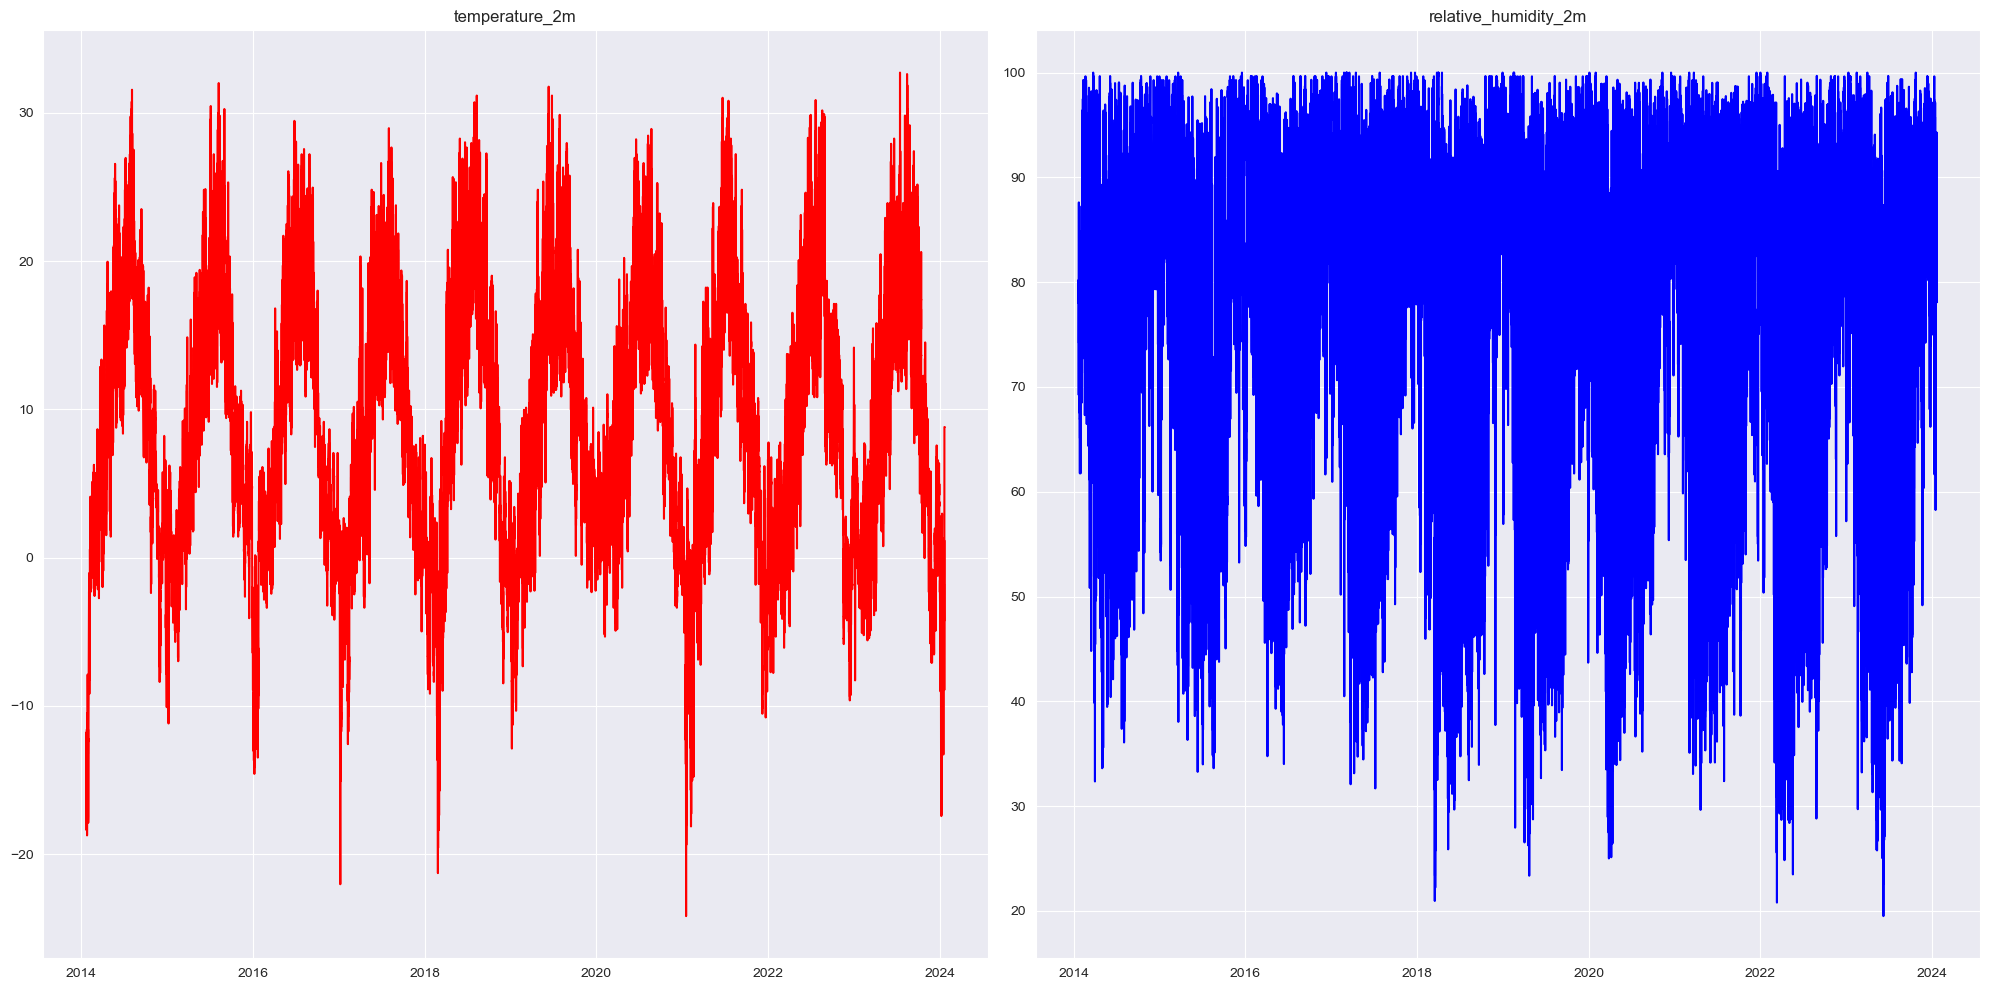

In [88]:
plt.figure(figsize=(30,30))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
x = df['date']
y_temp = df['temperature_2m']
y_hum = df['relative_humidity_2m']
axes[0].plot(x, y_temp, color='red', label='temperature_2m')
axes[0].set_title('temperature_2m')
axes[1].plot(x, y_hum, color='blue', label='relative_humidity_2m')
axes[1].set_title('relative_humidity_2m')
plt.tight_layout()
plt.show()

<Figure size 3000x3000 with 0 Axes>

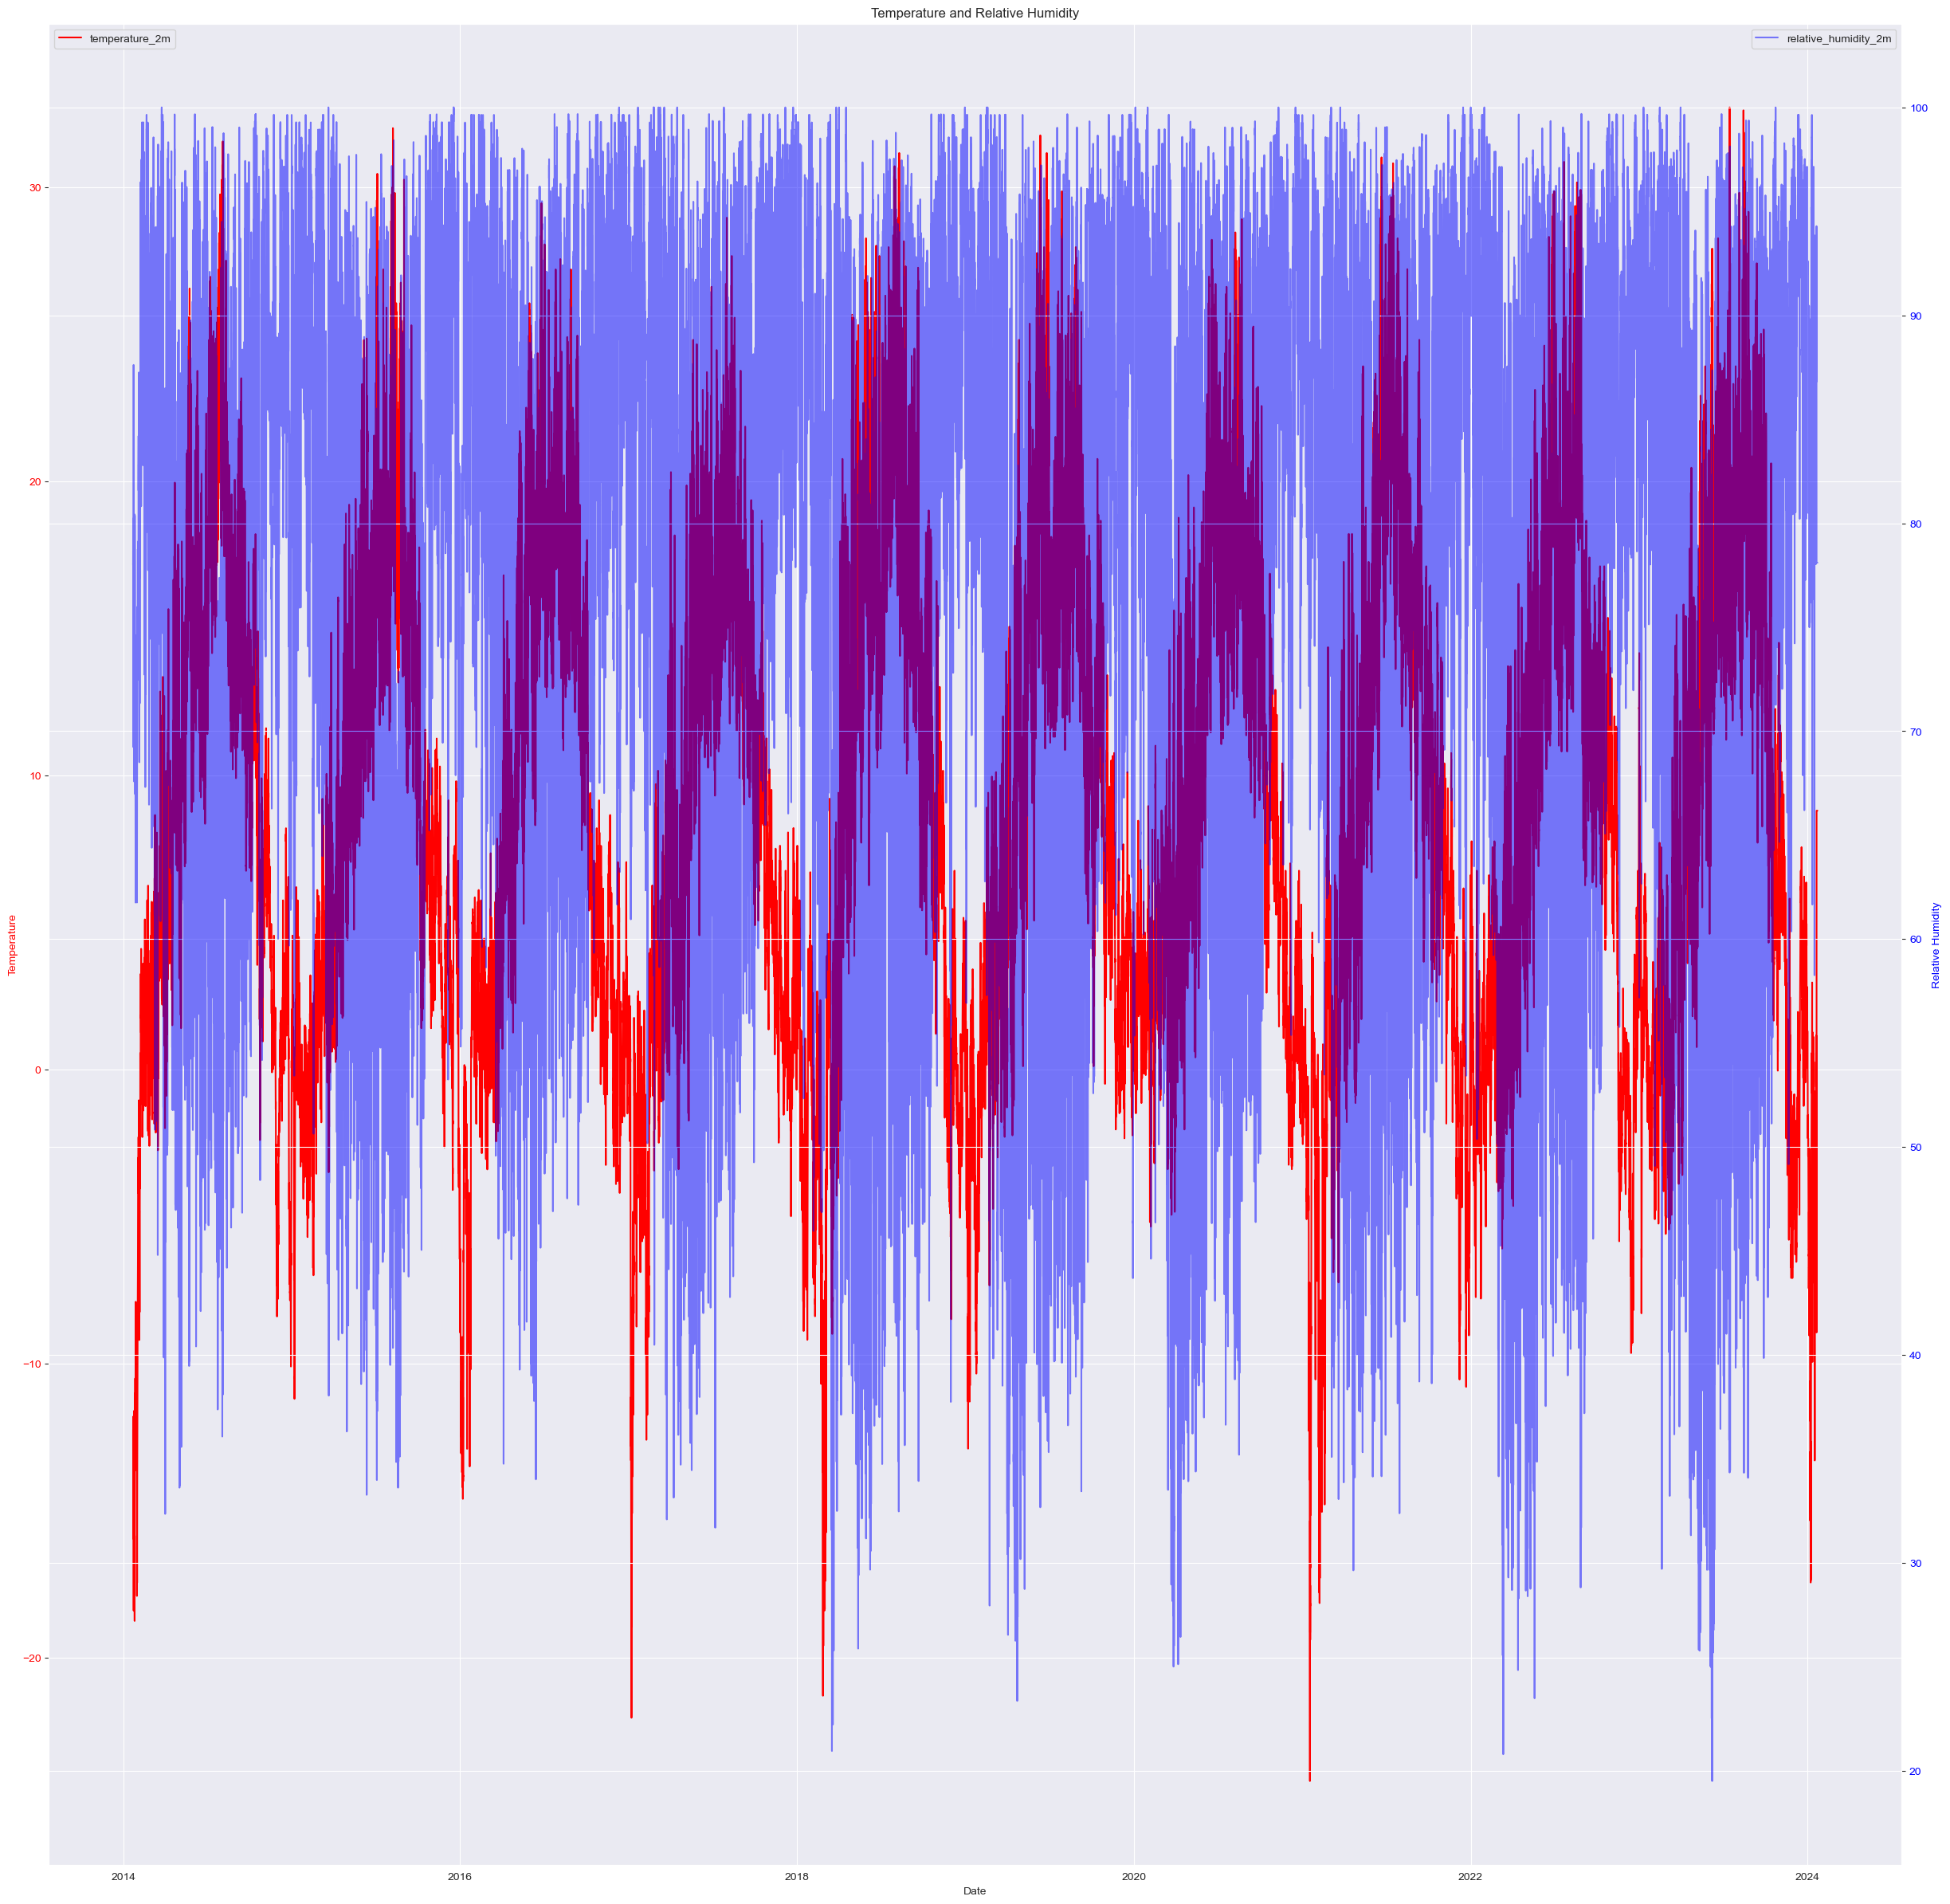

In [89]:
import matplotlib.pyplot as plt

# Set the overall figure size
plt.figure(figsize=(30, 30))
plt.tight_layout()

# Create a 1x1 grid of subplot
fig, ax1 = plt.subplots(figsize=(30, 30))

x = df['date']
y_temp = df['temperature_2m']
y_hum = df['relative_humidity_2m']

# Plot temperature_2m on the primary y-axis (left)
ax1.plot(x, y_temp, color='red', label='temperature_2m')
ax1.set_ylabel('Temperature', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for relative_humidity_2m on the right side
ax2 = ax1.twinx()
ax2.plot(x, y_hum, color='blue', label='relative_humidity_2m', alpha=0.5)
ax2.set_ylabel('Relative Humidity', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set titles and labels
ax1.set_title('Temperature and Relative Humidity')
ax1.set_xlabel('Date')

# Display legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

### Wykres rocznego zakresu czasu ze względu na lepszą czytelność.

In [90]:
from utils import get_data_by_year
df_2023 = get_data_by_year(2023)

<Figure size 3000x3000 with 0 Axes>

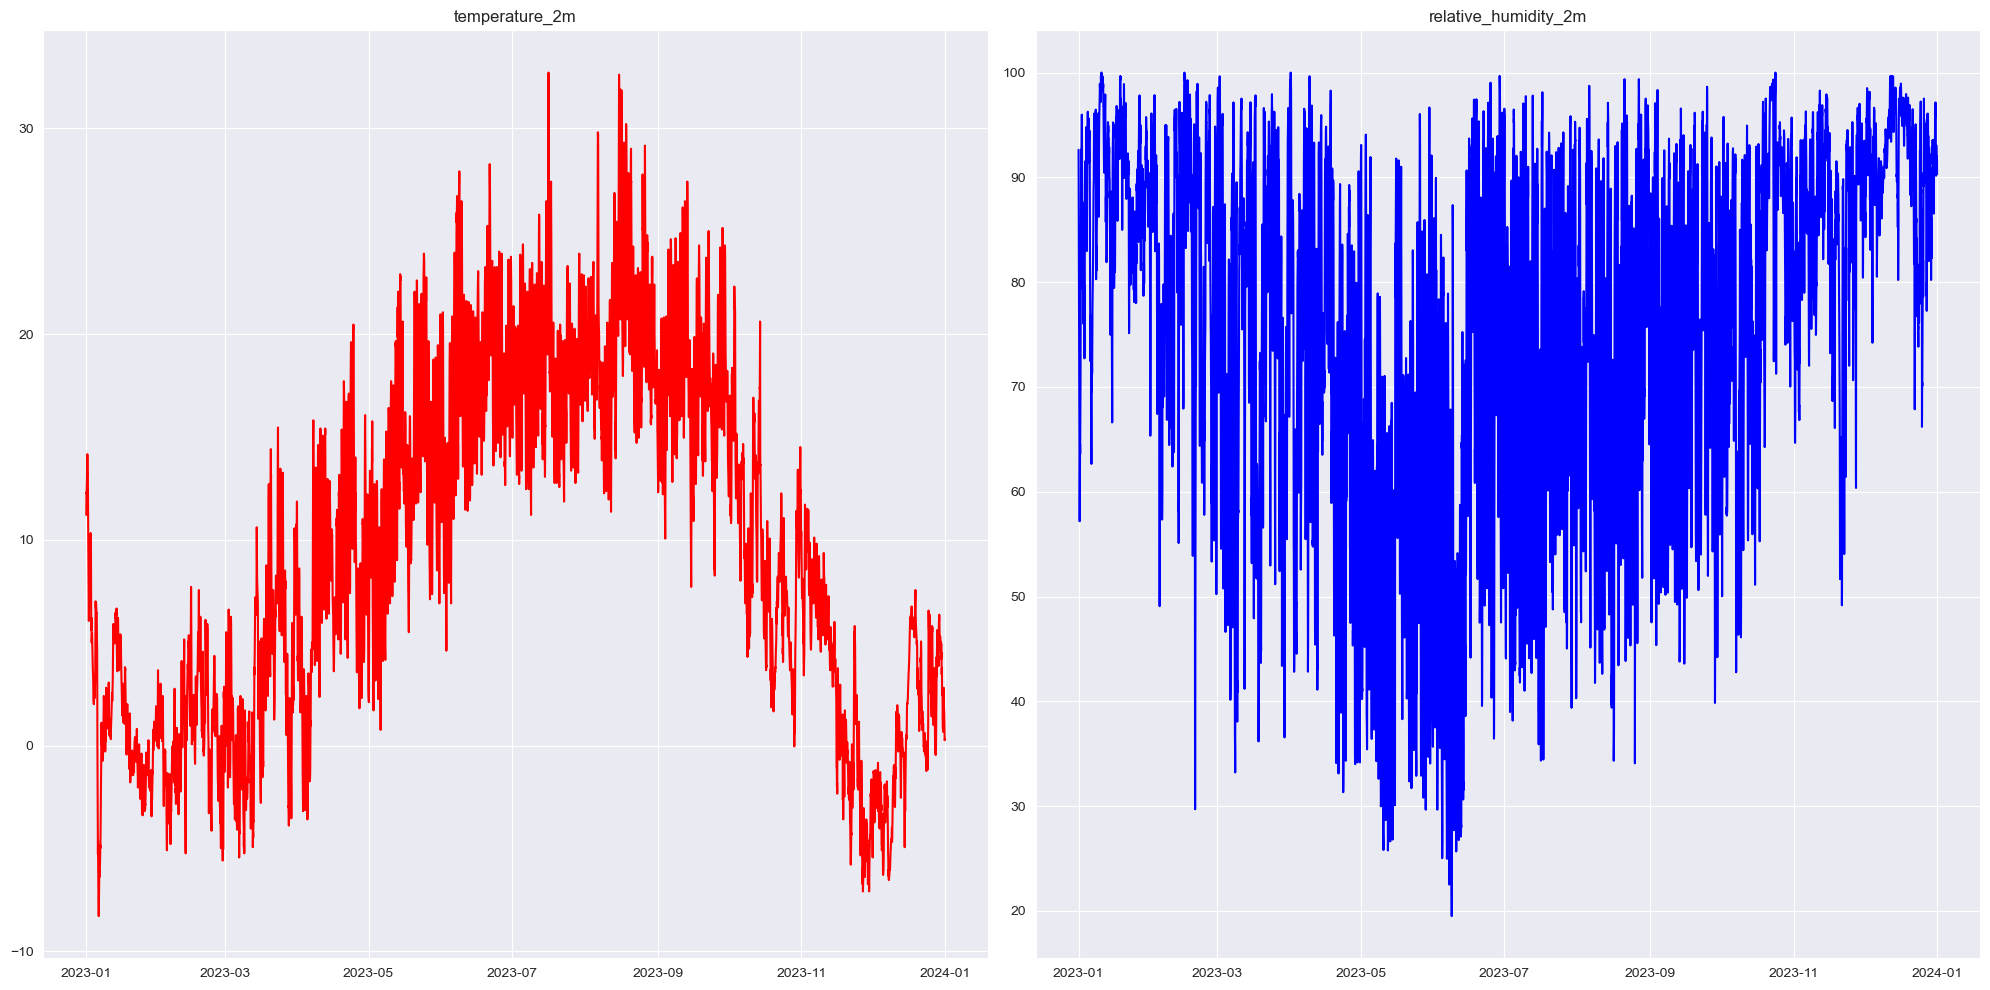

In [91]:
plt.figure(figsize=(30,30))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
x = df_2023['date']
y_temp = df_2023['temperature_2m']
y_hum = df_2023['relative_humidity_2m']
axes[0].plot(x, y_temp, color='red', label='temperature_2m')
axes[0].set_title('temperature_2m')
axes[1].plot(x, y_hum, color='blue', label='relative_humidity_2m')
axes[1].set_title('relative_humidity_2m')
plt.tight_layout()
plt.show()

### Wnioski
W przeprowadzonym teście Pearsona wilgotność powietrza jest powiązana z temperaturą powietrza. Z racji, że korelacja wyniosła -0,41, oznacza to, że im większa temperatura, tym mniejsza wilgotność powietrza. Oznacza to również, że powiązanie między tymi dwoma zmiennymi istnieje, ale nie jest aż tak bardzo mocne. W praktyce tak jak przedstawiły to wykresy, nie zawsze wysoka temperatura ma odwrócony wpływ na wilgotność.
Wykresy pokazują, że w okresach letnich, wilgotność spada. Co prawda nie zawsze ma to wpływ, co może dowodzić istnieniu jakiejś zmiennej, która ma na to wpływ. Z mojej wiedzy wynika to prawdopodobnie z opadów deszczu. Z racji, że są to tylko przypuszczenia, w poniższym przykładzie zostanie to sprawdzone.

### Wrzucenie danych do bazy danych

In [92]:
engine = create_engine(f'postgresql://{DATABASE["user"]}:{DATABASE["password"]}@{DATABASE["host"]}:{DATABASE["port"]}/{DATABASE["database"]}')
table_name = 'temperature_relative_humidity_correlation_data'

df[['temperature_2m', 'relative_humidity_2m']].to_sql(table_name, engine, index=True, if_exists='replace')
print(f"Data pushed to table '{table_name}' successfully.")

Data pushed to table 'temperature_relative_humidity_correlation_data' successfully.


# Analiza
### Sprawdzenie czy opady deszczu mają wpływ na względną wilgotność oraz temperaturę.

### Hipotezy:
Hipoteza 0: Opady deszczu nie mają wpływu na względną wilgotność powietrza i temperaturę.
Hipoteza 1: Opady deszczu mają wpływu na względną wilgotność powietrza i temperaturę.
Hipoteza 2: Opady deszczu mają wpływu na względną wilgotność powietrza, ale nie na temperaturę.
Hipoteza 3: Opady deszczu nie mają wpływu na względną wilgotność powietrza, ale mają na temperaturę.

Najpierw rozpatrzmy korelację między pojedyńczymi zmiennymi. Korelacja między temperaturą a wilgotnością, temperatura a opady deszczu oraz wilgotność a opady deszczu. Przeprowadzimy test Pearsona

In [93]:
from utils import check_correlation

correlation_temp_humidity = df['temperature_2m'].corr(df['relative_humidity_2m'])
correlation_temp_rain = df['temperature_2m'].corr(df['rain'])
correlation_humidity_rain = df['rain'].corr(df['relative_humidity_2m'])


print(f'Korelacja między temperaturą a względną wilgotnością: {correlation_temp_humidity} | {check_correlation(correlation_temp_humidity)}')
print(f'Korelacja między temperaturą a deszczem: {correlation_temp_rain} | {check_correlation(correlation_temp_rain)}')
print(f'Korelacja między deszczem a względną wilgotnością: {correlation_humidity_rain} | {check_correlation(correlation_humidity_rain)}')

Korelacja między temperaturą a względną wilgotnością: -0.42762927745334695 | Korelacja słaba
Korelacja między temperaturą a deszczem: 0.07719309115621158 | Korelacja słaba
Korelacja między deszczem a względną wilgotnością: 0.15467784025796422 | Korelacja słaba


Korelacja między temperaturą a względną wilgotnością jest największa, lecz dalej jest korelacją słabą, co oznacza, że wzrost temperatury obniża wilgotność.
Z kolei reszta korelacji nie przekracza 0,2, zo oznacza, że powiązanie między zmiennymi istnieje, ale jest bardzo małe.

### Macierz korelacji między tymi trzema zmiennymi

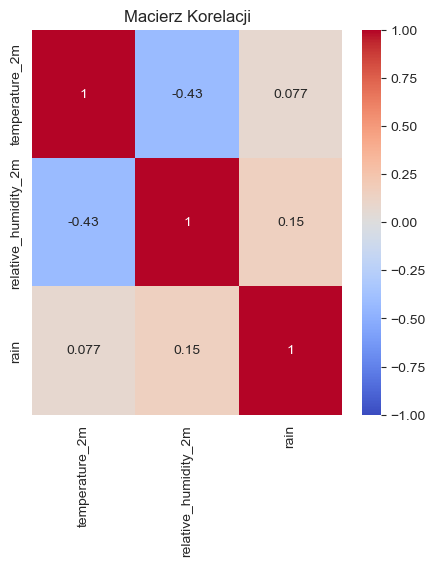

In [94]:
correlation_matrix = df[['temperature_2m', 'relative_humidity_2m', 'rain']].corr()
plt.figure(figsize=(5,5))
plt.tight_layout
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# Dodanie tytułu
plt.title('Macierz Korelacji')
plt.show()

In [95]:
if abs(correlation_temp_rain) > 0 and abs(correlation_humidity_rain) > 0:
    print('Hipoteza 1 potwierdzona')
elif abs(correlation_temp_rain) <= 0 and abs(correlation_humidity_rain) > 0:
    print('Hipoteza 2 potwierdzona')
elif abs(correlation_temp_rain) > 0 and abs(correlation_humidity_rain) <= 0:
    print('Hipoteza 3 potwierdzona')
else:
    print('Hipoteza 0 potwierdzona')

Hipoteza 1 potwierdzona


### Wykresy potwierdzające hipotezę

<Figure size 3000x3000 with 0 Axes>

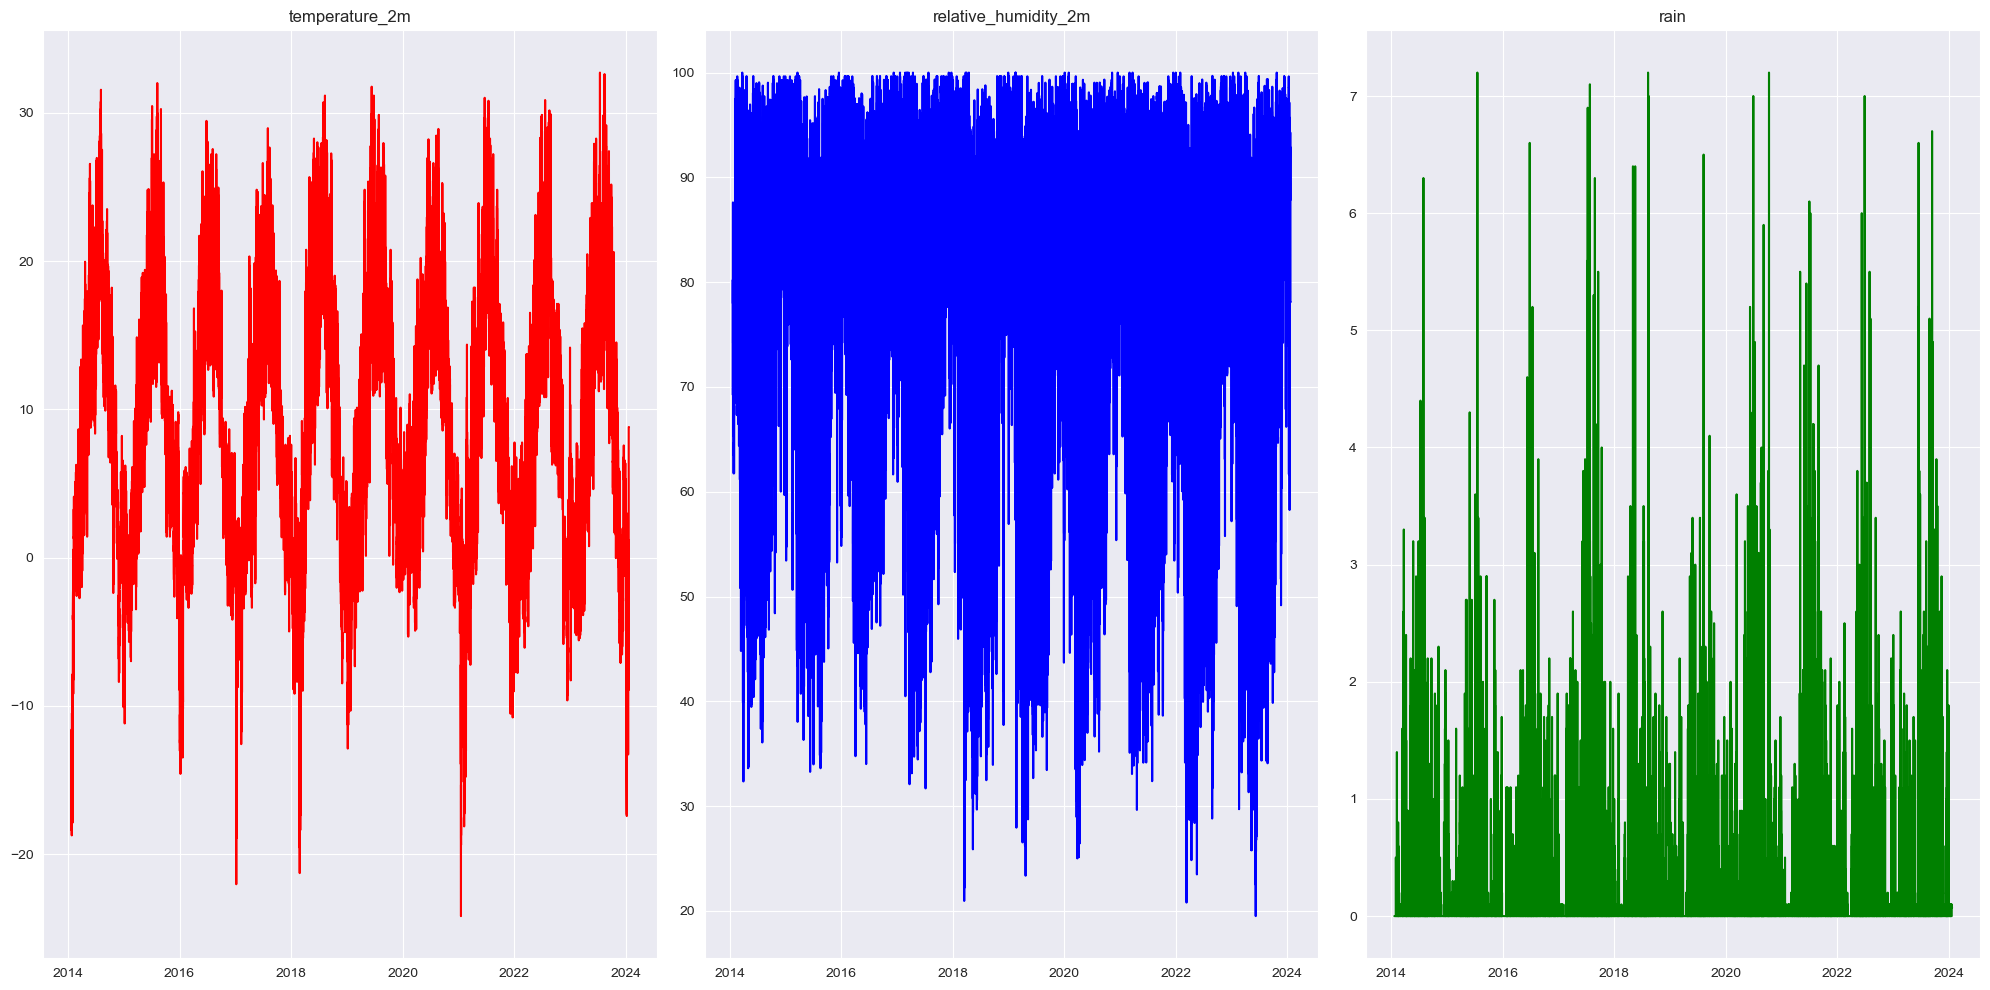

In [96]:
plt.figure(figsize=(30,30))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
x = df['date']
y_temp = df['temperature_2m']
y_hum = df['relative_humidity_2m']
y_rain = df['rain']
axes[0].plot(x, y_temp, color='red', label='temperature_2m')
axes[0].set_title('temperature_2m')
axes[1].plot(x, y_hum, color='blue', label='relative_humidity_2m')
axes[1].set_title('relative_humidity_2m')
axes[2].plot(x, y_rain, color='green', label='rain')
axes[2].set_title('rain')
plt.tight_layout()
plt.title
plt.show()

Dane z roku 2023

<Figure size 3000x3000 with 0 Axes>

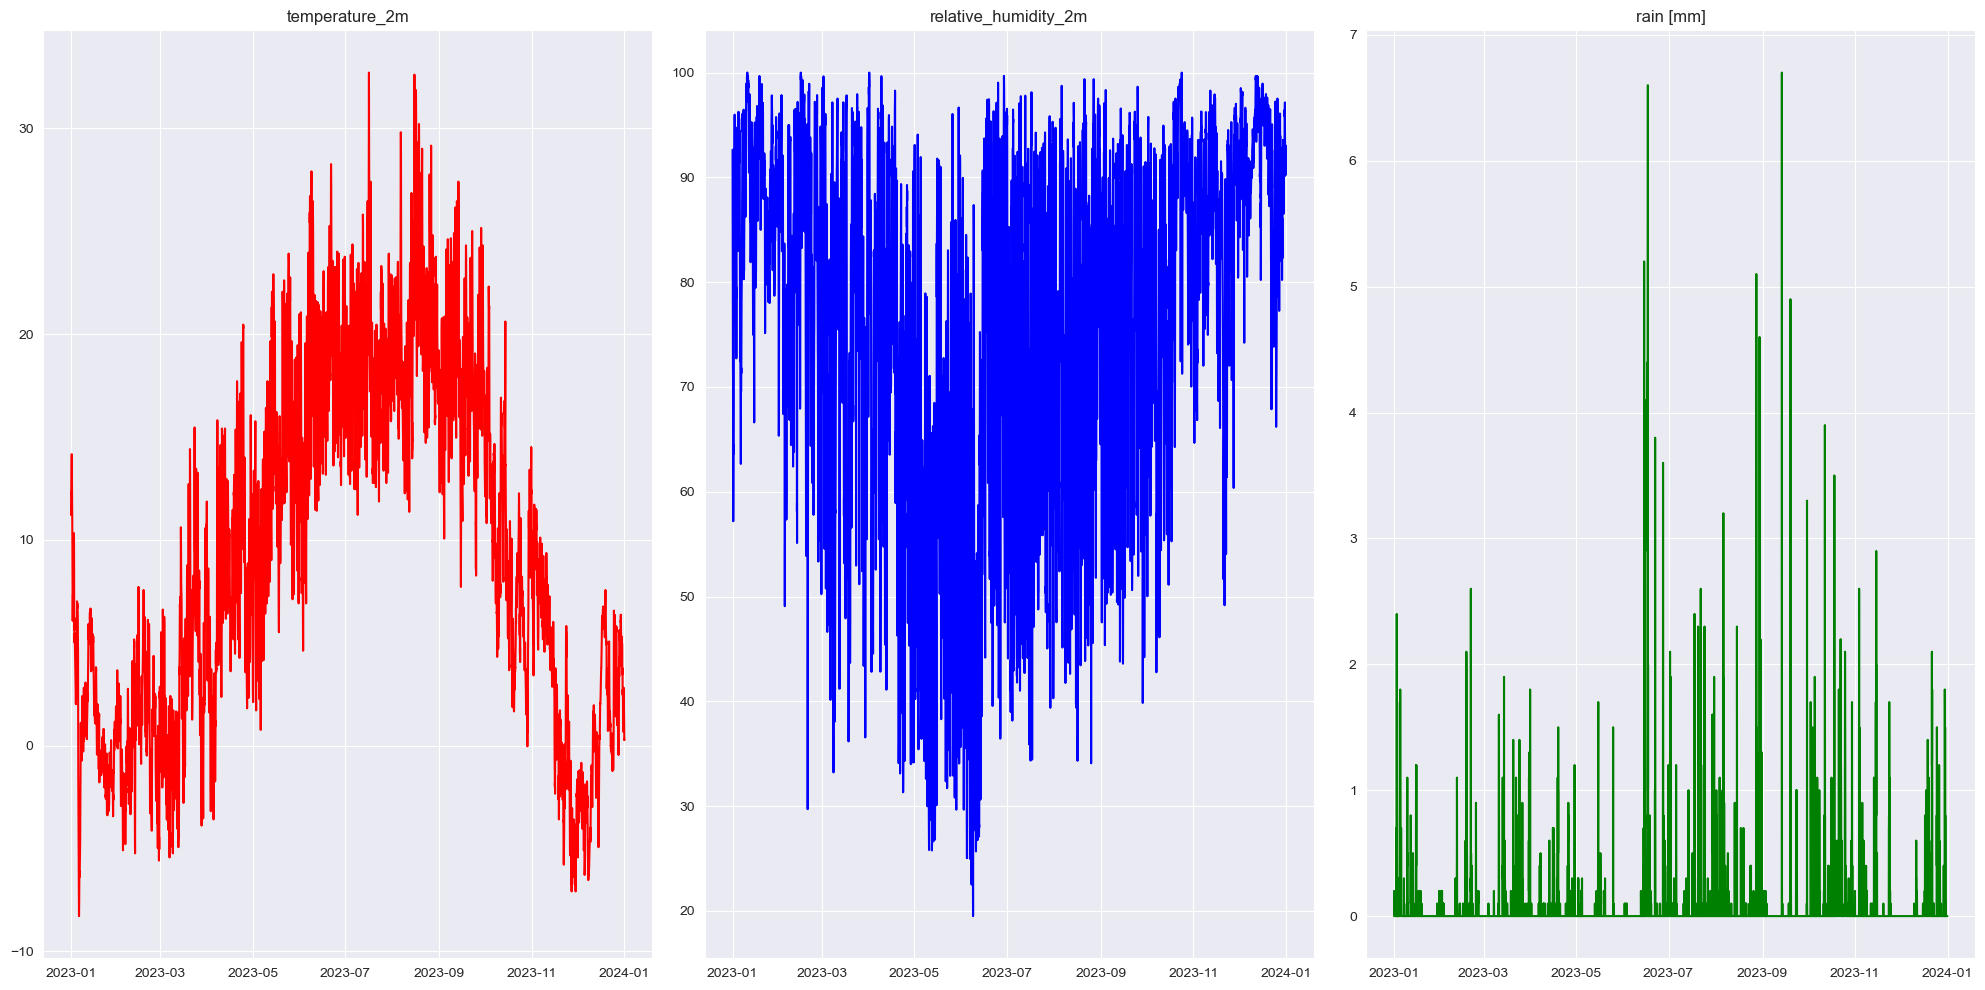

In [97]:
from utils import get_data_by_year

df_2023 = get_data_by_year(2023)

plt.figure(figsize=(30,30))
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
x = df_2023['date']
y_temp = df_2023['temperature_2m']
y_hum = df_2023['relative_humidity_2m']
y_rain = df_2023['rain']
axes[0].plot(x, y_temp, color='red', label='temperature_2m')
axes[0].set_title('temperature_2m')
axes[1].plot(x, y_hum, color='blue', label='relative_humidity_2m')
axes[1].set_title('relative_humidity_2m')
axes[2].plot(x, y_rain, color='green', label='rain')
axes[2].set_title('rain [mm]')
plt.tight_layout()
plt.title
plt.show()

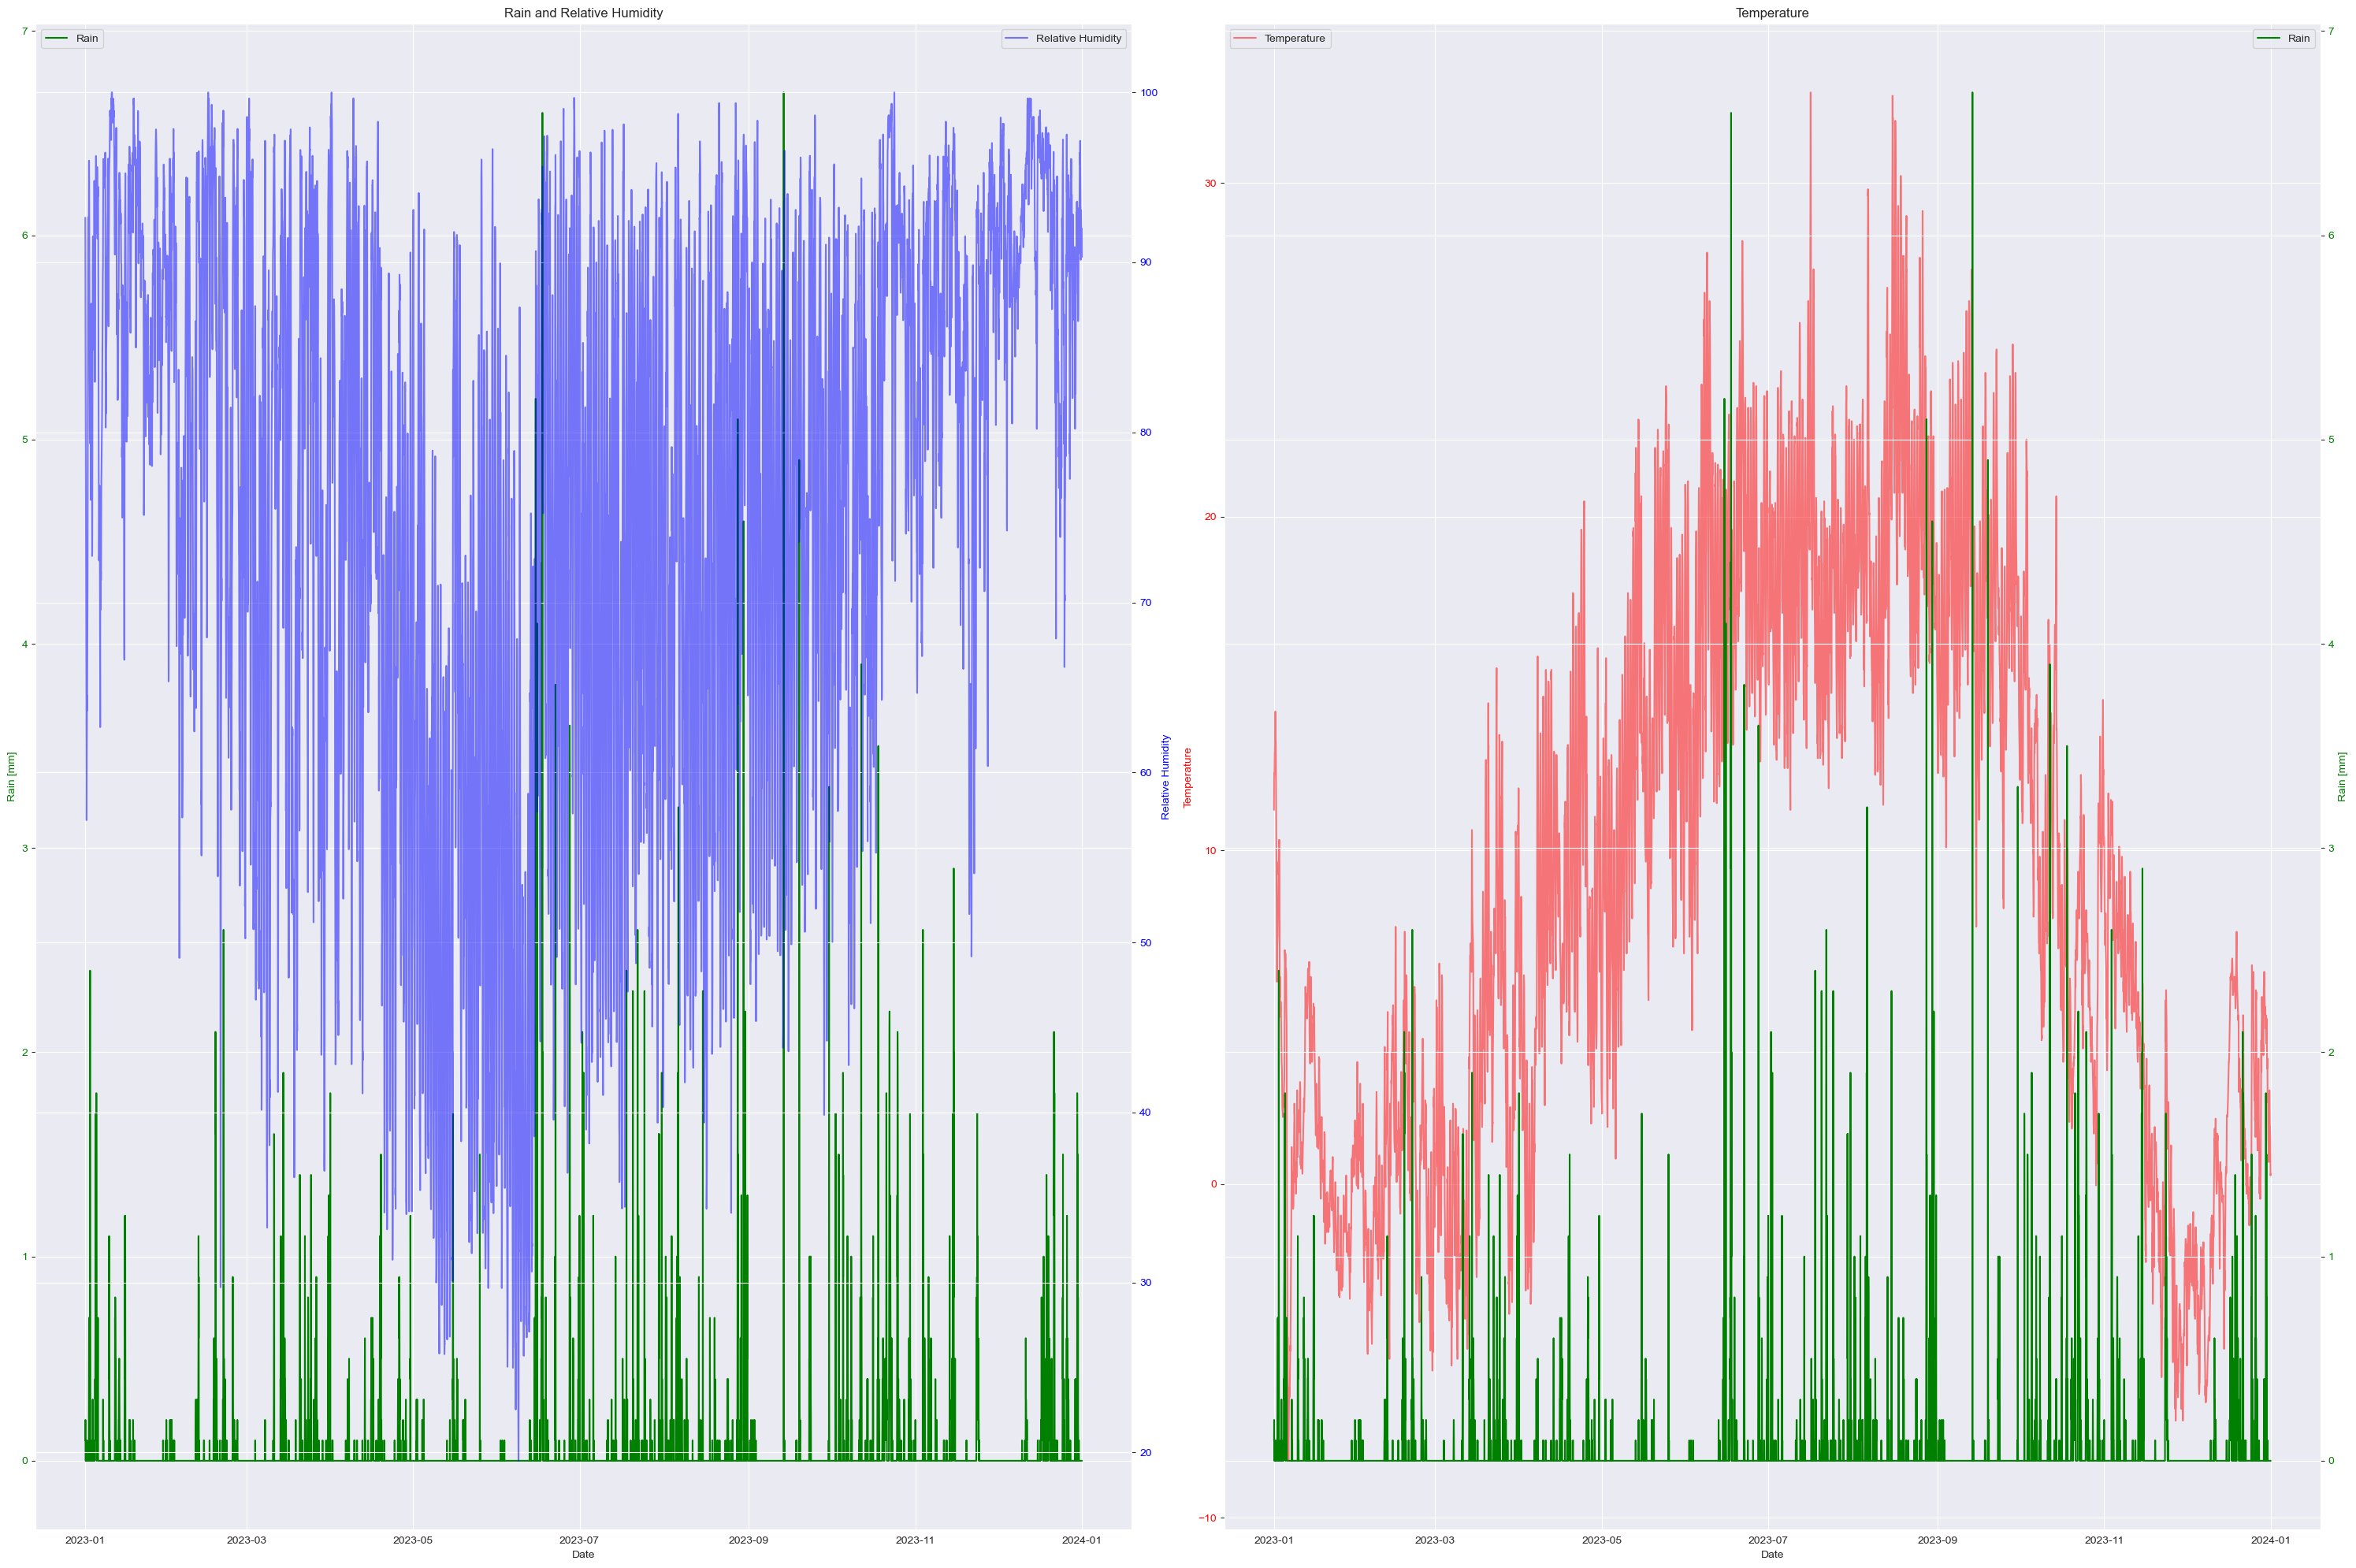

In [98]:
import matplotlib.pyplot as plt

# Assuming df_2023 is your DataFrame

# Set the overall figure size
plt.figure(figsize=(30, 20))  # Adjust the figure size as needed

# Plotting humidity and rain on the left side
ax1 = plt.subplot(1, 2, 1)
x = df_2023['date']
y_rain = df_2023['rain']
y_hum = df_2023['relative_humidity_2m']

ax1.plot(x, y_rain, color='green', label='Rain')
ax1.set_ylabel('Rain [mm]', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(x, y_hum, color='blue', label='Relative Humidity', alpha=0.5)
ax2.set_ylabel('Relative Humidity', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Set titles and labels
ax1.set_title('Rain and Relative Humidity')
ax1.set_xlabel('Date')

# Display legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Plotting temperature on the right side
ax3 = plt.subplot(1, 2, 2)
y_temp = df_2023['temperature_2m']

ax3.plot(x, y_temp, color='red', label='Temperature', alpha=0.5)
ax3.set_ylabel('Temperature', color='red')
ax3.tick_params(axis='y', labelcolor='red')

ax4 = ax3.twinx()
ax4.plot(x, y_rain, color='green', label='Rain')
ax4.set_ylabel('Rain [mm]', color='green')
ax4.tick_params(axis='y', labelcolor='green')


# Set titles and labels
ax3.set_title('Temperature')
ax3.set_xlabel('Date')

# Display legend
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Wnioski

Z macierzy korelacji oraz wykresów można wyciągnąć wnioski:
- temperatura wpływa na wilgotność powietrza chociaż korelacja między waertościami jest słaba. Dobrze przedstawione jest to na wykresach, gdzie w okresie letnim, wilgotność jest mniejsza.
- opady deszczy mają bardzo słabą korelację między temperaturą a względną wilgotnością powietrza.
- na wykresach można zauważyć, że gdy opady deszczy są duże, wilgotność pomimo wysokiej temperatury rośnie, lecz gdy tylko deszcz maleje, to wilgotność bardzo szybko maleje. Pokazuje to, że temperatura ma większy wpływ na wilgotność.

Z przeprowadzonych wyżej badań w skrócie wynika, że opad deszczu podwyższa względną wilgotność, ale z racji, że temperatura ma dużo silniejszą korelację niż deszcz, Powoduje, że wilgotność bardzo szybko opada.

### Wrzucenie danych do bazy danych.

In [99]:
engine = create_engine(f'postgresql://{DATABASE["user"]}:{DATABASE["password"]}@{DATABASE["host"]}:{DATABASE["port"]}/{DATABASE["database"]}')
table_name = 'temperature_relative_humidity_rain_correlation_data'

df[['temperature_2m', 'relative_humidity_2m', 'rain']].to_sql(table_name, engine, index=True, if_exists='replace')
print(f"Data pushed to table '{table_name}' successfully.")

Data pushed to table 'temperature_relative_humidity_rain_correlation_data' successfully.
